
# Introduction of COVID-19
![COVID-19](https://www.mdpi.com/viruses/viruses-09-00369/article_deploy/html/images/viruses-09-00369-g001.png)
 [wiki/Coronavirus](https://en.wikipedia.org/wiki/Coronavirus)
### FAST FACTS:

* COVID-19 is caused by a new coronavirus strain called **SARS-CoV-2.**
* The virus causes mild symptoms in the majority of people, including a dry cough and temperature, which can be managed at home without special treatment.
* Some people develop severe COVID-19 and need to be hospitalised. Older people and those with underlying health conditions are most at-risk.
* Frequent hand washing with soap and water, use of an alcohol-based hand sanitiser and avoiding people who are unwell, are the best ways to prevent COVID-19.
* If you feel unwell, stay at home and call your local health authority. They will tell you what to do next.

### How is COVID-19 spread?
**COVID-19 is spread through contact with respiratory droplets of a person currently infected with the virus. These droplets come from the nose or mouth of an infected person and may land on surfaces and objects around them. The virus is then spread when another person comes into contact with these droplets and touches their own face, nose or mouth.**

**The virus may also be spread when an infected person sneezes, coughs or exhales, and people around them breathe in these micro-droplets. For this reason, it’s important to stay around one meter (3 feet) away from someone you know to have the virus.**
<hr>



## This is why Social Distancing is important :-

![covid-19](https://arhsharbinger.com/wp-content/uploads/2020/03/800px-SlowTheSpread.png)

<hr>

![social-dist](https://economynext.com/wp-content/uploads/2020/03/social_distancing_infographics-1.jpg)

### Please don't PANIC, stay safe, follow your nation and WHO guidelines.

<hr>

### DATA RESOURCE [JOHNS HOPKINS UNIVERSITY](https://github.com/CSSEGISandData/COVID-19)
### Follow me on [GitHub](https://github.com/Asmit987)
### My LinkdIn Profile [LinkedIn](https://www.linkedin.com/in/asmit-pandey-90736b19b/)

<hr>

## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import plotly.express as px
import folium 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import BSpline, make_interp_spline
from plotly.offline import init_notebook_mode, iplot, plot


<hr> 

## Load and clean Data

In [2]:
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [3]:
confirmed_df.shape

(266, 161)

In [4]:
conf = confirmed_df.T.set_index(np.asarray(range(161))).T
recov = recovered_df.T.set_index(np.asarray(range(161))).T
dth = deaths_df.T.set_index(np.asarray(range(161))).T

conf = conf.groupby([1]).sum().sort_values([160],ascending = False)
recov = recov.groupby([1]).sum().sort_values([160],ascending = False)
dth = dth.groupby([1]).sum().sort_values([160],ascending = False)

In [5]:
conf_A = conf.iloc[:,4:].transpose()
recov_A = recov.iloc[:,4:].transpose()
dth_A = dth.iloc[:,4:].transpose()

In [6]:
drp_C = confirmed_df.drop(columns=['Province/State','Lat','Long'])
drp_C = drp_C.drop(columns=['Country/Region']).sum()
drp_c = pd.DataFrame(drp_C)

drp_D = deaths_df.drop(columns=['Province/State','Lat','Long'])
drp_D = drp_D.drop(columns=['Country/Region']).sum()
drp_d = pd.DataFrame(drp_D)

drp_R = recovered_df.drop(columns=['Province/State','Lat','Long'])
drp_R = drp_R.drop(columns=['Country/Region']).sum()
drp_r = pd.DataFrame(drp_R)


In [7]:
total_deaths = pd.DataFrame(deaths_df.iloc[:,160:].sum(),columns=['Deaths'])
total_confirmed = pd.DataFrame(confirmed_df.iloc[:,160:].sum(),columns=['Confirmed'])
total_recovered = pd.DataFrame(recovered_df.iloc[:,160:].sum(),columns=['Recovered'])

In [8]:
covid = pd.concat([total_confirmed,total_recovered,total_deaths,],axis = 1)

In [9]:
df2 = confirmed_df.groupby(['Country/Region']).sum()
df3 = recovered_df.groupby(['Country/Region']).sum()
df4 = deaths_df.groupby(['Country/Region']).sum()

In [10]:
df10 = df2.iloc[:,158:]
df11 = df3.iloc[:,158:]
df12 = df4.iloc[:,158:]

In [11]:
covid_19 = pd.concat([df10,df11,df12],axis = 1, ignore_index = True )
covid_19.rename(columns = {0:'Confirmed',1:'Recovered',2:'Deaths'},inplace = True)
covid_19['Active'] = covid_19['Confirmed'] - (covid_19['Recovered'] + covid_19['Deaths'])

In [12]:
df_conf = covid_19.sort_values(by = ['Confirmed'],ascending = False)
df_actv = covid_19.sort_values(by = ['Active'], ascending = False)
df_recv = covid_19.sort_values(by = ['Recovered'], ascending = False)
df_dth = covid_19.sort_values(by = ['Deaths'], ascending = False)


## Total Confirmed, Recovered, Deaths, and Active Cases in the world

In [13]:
covid['Active'] = covid['Confirmed']-(covid['Deaths']+covid['Recovered'])
covid['Mortality Rate(per 100)'] = covid['Deaths']*100/covid['Confirmed']
covid['Recovery Rate(per 100)'] = covid['Recovered']*100/covid['Confirmed']
covid.style.background_gradient(cmap = 'Wistia',axis = 1)

## Country wise Reported Cases

In [14]:
covid_19['Mortality Rate(per 100)'] = covid_19['Deaths']*100/covid_19['Confirmed']
covid_19['Recovery Rate(per 100)'] = covid_19['Recovered']*100/covid_19['Confirmed']
covid_19.style.background_gradient(cmap = "Greens",axis = 1)\
.background_gradient(cmap = "Purples" ,subset=['Mortality Rate(per 100)'])\
.background_gradient(cmap = "Purples" ,subset=['Deaths'])\
.background_gradient(cmap = "Wistia" ,subset=['Confirmed'])

<hr>

Text(0.5, 1.0, '-: TOP 50 COUNTRY :- \n(Confirmed, Recovered, Death cases)')

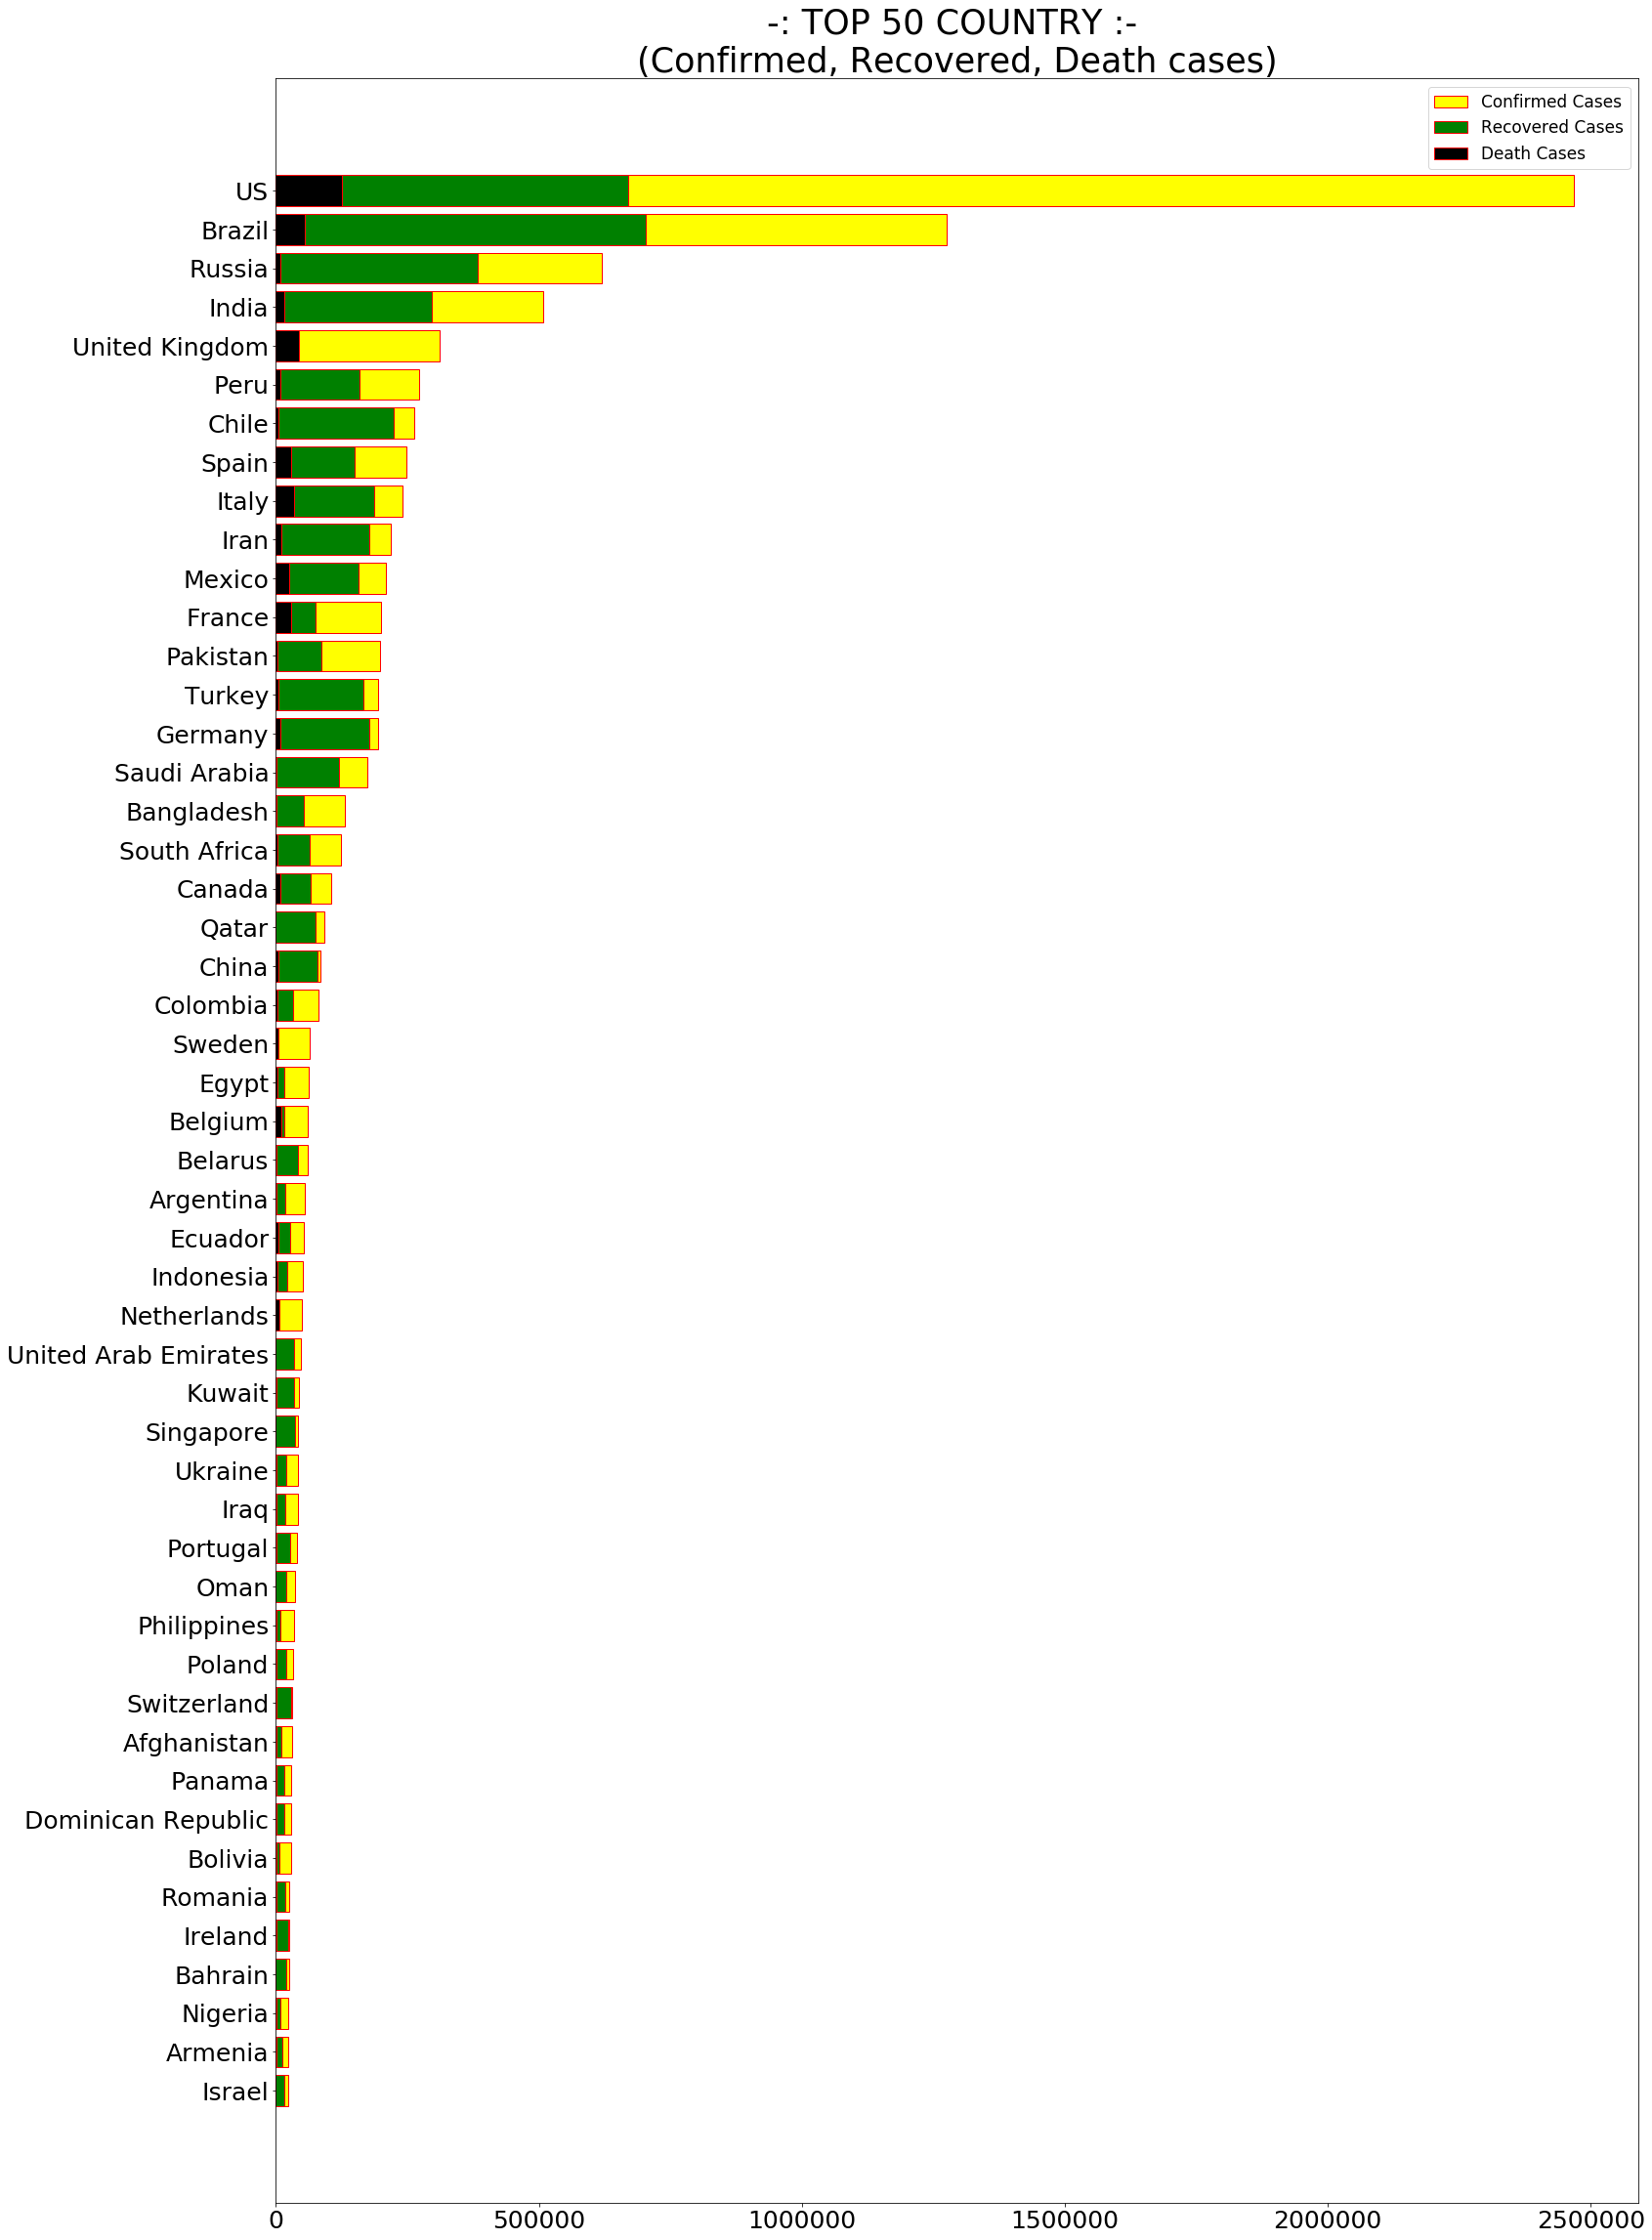

In [17]:
plt.figure(figsize = (25,40))
#plt.plot(df_conf.sort_values('Confirmed')["Confirmed"].values[-50:]+50000 ,df_conf.sort_values('Confirmed')["Confirmed"].index[-50:],marker = 'o',linewidth=3, markersize = 10,markerfacecolor='#ffffff')
plt.barh(df_conf.sort_values('Confirmed')["Confirmed"].index[-50:],df_conf.sort_values('Confirmed')["Confirmed"].values[-50:],color='yellow',edgecolor = 'red')
plt.barh(df_conf.sort_values('Confirmed')["Recovered"].index[-50:],df_conf.sort_values('Confirmed')["Recovered"].values[-50:],color='green',edgecolor = 'red')
plt.barh(df_conf.sort_values('Confirmed')["Deaths"].index[-50:],df_conf.sort_values('Confirmed')["Deaths"].values[-50:],color='black',edgecolor = 'red')

plt.tick_params(labelsize=25)
plt.legend(['Confirmed Cases','Recovered Cases','Death Cases'],prop={'size':17})
plt.title('-: TOP 50 COUNTRY :- \n(Confirmed, Recovered, Death cases)', size = 35)

Text(0.5, 1.0, '-: LEAST 50 COUNTRY :- \n(Confirmed, Recovered, Death cases)')

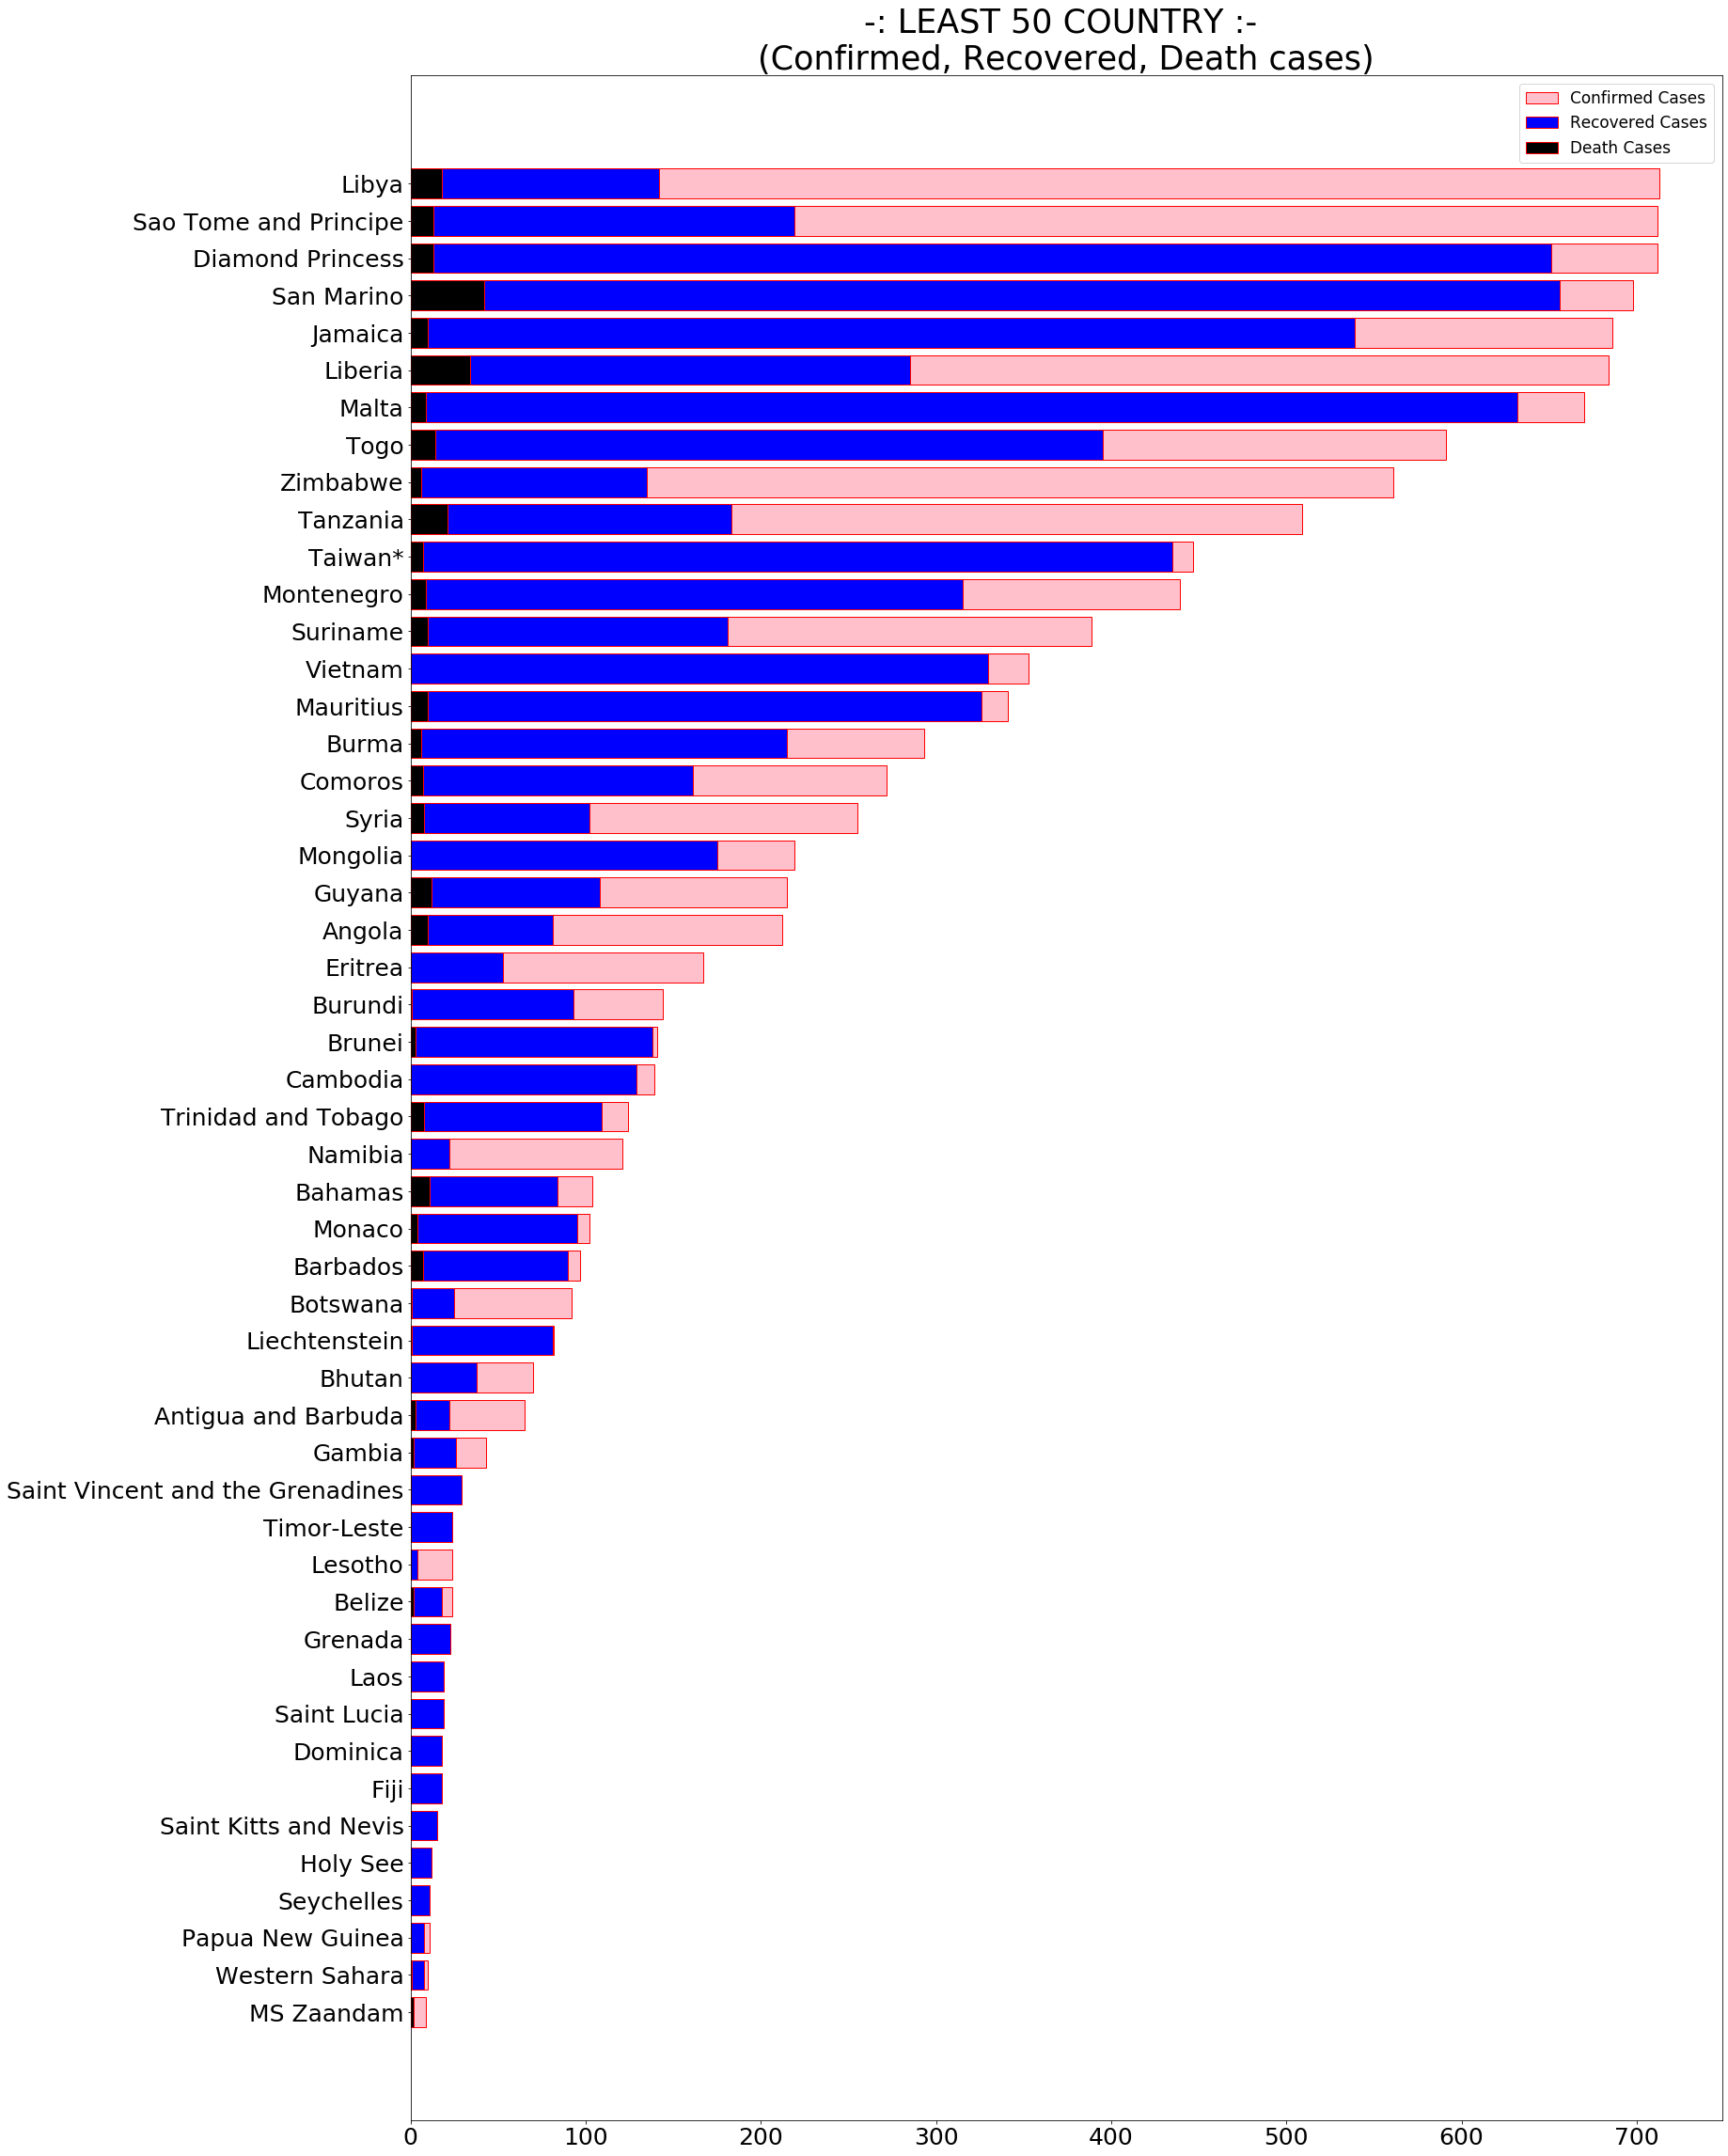

In [18]:
plt.figure(figsize = (25,40))
#plt.plot(df_conf.sort_values('Confirmed')["Confirmed"].values[-50:]+50000 ,df_conf.sort_values('Confirmed')["Confirmed"].index[-50:],marker = 'o',linewidth=3, markersize = 10,markerfacecolor='#ffffff')
plt.barh(df_conf.sort_values('Confirmed')["Confirmed"].index[:50],df_conf.sort_values('Confirmed')["Confirmed"].values[:50],color='pink',edgecolor = 'red')
plt.barh(df_conf.sort_values('Confirmed')["Recovered"].index[:50],df_conf.sort_values('Confirmed')["Recovered"].values[:50],color='blue',edgecolor = 'red')
plt.barh(df_conf.sort_values('Confirmed')["Deaths"].index[:50],df_conf.sort_values('Confirmed')["Deaths"].values[:50],color='black',edgecolor = 'red')

plt.tick_params(labelsize=25)
plt.legend(['Confirmed Cases','Recovered Cases','Death Cases'],prop={'size':17})
plt.title('-: LEAST 50 COUNTRY :- \n(Confirmed, Recovered, Death cases)', size = 35)

<hr>

## Top 10 Country (Confirmed, Recovered, Deaths and Active cases)

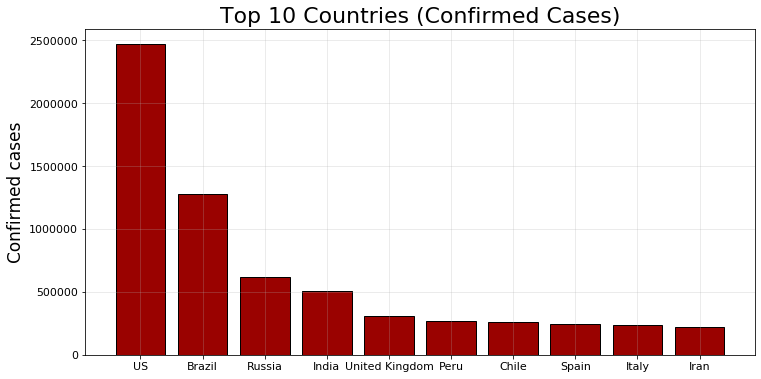

In [19]:
plt.figure(figsize=(12,6))
plt.bar(df_conf["Confirmed"].index[:10],df_conf["Confirmed"].values[:10],color='#9a0200',edgecolor = 'black')
plt.ylabel('Confirmed cases',fontsize=17)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=22)
plt.grid(alpha=0.3)
plt.tick_params(labelsize = 11)
#plt.savefig('Top 10 Countries (Confirmed Cases).png')

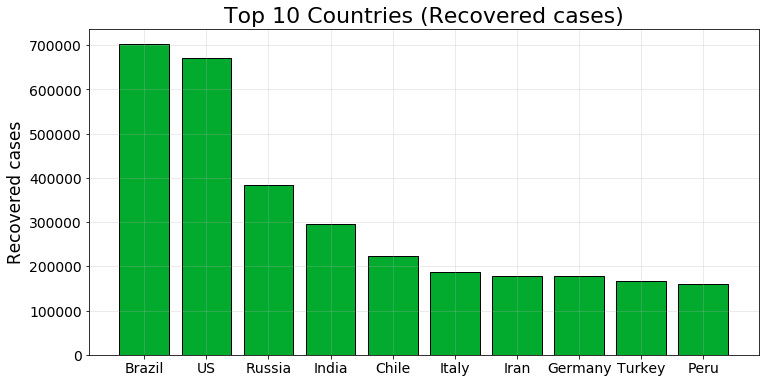

In [20]:
plt.figure(figsize = (12,6))
plt.bar(df_recv['Recovered'].index[:10],df_recv['Recovered'].values[:10],color= '#02ab2e',edgecolor = 'black')
plt.ylabel('Recovered cases',fontsize=17)
plt.title('Top 10 Countries (Recovered cases)', fontsize = 22)
plt.tick_params(labelsize = 14)
plt.grid(alpha = 0.3)
#plt.savefig('Top 10 Countries (Recovered cases).png')

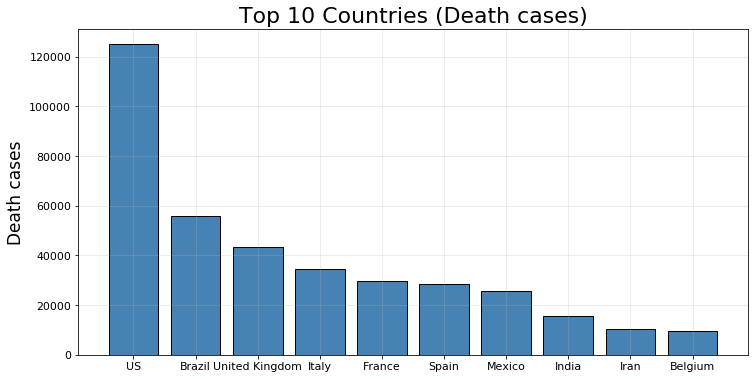

In [21]:
plt.figure(figsize = (12,6))
plt.bar(df_dth['Deaths'].index[:10],df_dth['Deaths'].values[:10],color = 'steelblue',edgecolor = 'black')
plt.ylabel('Death cases', fontsize = 17)
plt.title('Top 10 Countries (Death cases)',fontsize = 22)
plt.tick_params(labelsize = 11)
plt.grid(alpha = 0.3)
#plt.savefig('Top 10 Countries (Death cases).png')

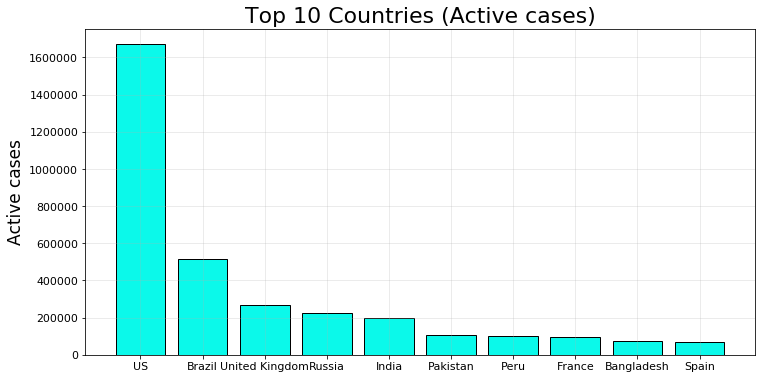

In [22]:
plt.figure(figsize = (12,6))
plt.bar(df_actv['Active'].index[:10],df_actv['Active'].values[:10],color = '#0bf9ea',edgecolor = 'black')
plt.ylabel('Active cases',fontsize = 17)
plt.title('Top 10 Countries (Active cases)',fontsize = 22)
plt.tick_params(labelsize = 11)  
plt.grid(alpha = 0.3)
#plt.savefig('Top 10 Countries (Active cases).png')

<hr>

## Recovery Rate & Mortality Rate

In [23]:
fig = px.bar(data_frame = covid_19,
                 x =covid_19.sort_values('Mortality Rate(per 100)')['Mortality Rate(per 100)'].index[-30:],
                 y =covid_19.sort_values('Mortality Rate(per 100)')['Mortality Rate(per 100)'].values[-30:],
                 title = 'Covid-19: Mortality Rate (TOP 30 Country)')

fig.update_xaxes(title_text = 'Country')
fig.update_yaxes(title_text = 'Mortality Rate(per 100)')
iplot(fig)

In [24]:
fig = px.bar(data_frame = covid_19,
                 x =covid_19.sort_values('Mortality Rate(per 100)')['Mortality Rate(per 100)'].index[:30],
                 y =covid_19.sort_values('Mortality Rate(per 100)')['Mortality Rate(per 100)'].values[:30],
                 title = 'Covid-19: Mortality Rate (Least 30 Country)')

fig.update_xaxes(title_text = 'Country')
fig.update_yaxes(title_text = 'Mortality Rate(per 100)')
iplot(fig)

In [25]:
fig = px.bar(data_frame = covid_19,
                 x =covid_19.sort_values('Recovery Rate(per 100)')['Recovery Rate(per 100)'].index[-30:],
                 y =covid_19.sort_values('Recovery Rate(per 100)')['Recovery Rate(per 100)'].values[-30:],
                 title = 'Covid-19: Recovery Rate (TOP 30 Country)')

fig.update_xaxes(title_text = 'Country')
fig.update_yaxes(title_text = 'Recovery Rate(per 100)')

iplot(fig)

In [26]:
fig = px.bar(data_frame = covid_19,
                 x =covid_19.sort_values('Recovery Rate(per 100)')['Recovery Rate(per 100)'].index[:30],
                 y =covid_19.sort_values('Recovery Rate(per 100)')['Recovery Rate(per 100)'].values[:30],
                 title = 'Covid-19: Recovery Rate (Least 30 Country)')

fig.update_xaxes(title_text = 'Country')
fig.update_yaxes(title_text = 'Recovery Rate(per 100)')

iplot(fig)

In [27]:
fig = px.scatter(covid_19,
            x = covid_19['Recovery Rate(per 100)'],
            y = covid_19['Mortality Rate(per 100)'],
            hover_name = covid_19.index,
            color = covid_19.index,
            title = 'Mortality Rate Vs Recovery Rate')
iplot(fig)

<hr>

## CORRELATION

In [28]:
covid_19.iloc[:,:].corr().style.background_gradient(cmap = 'Reds')

<hr>

## COVID-19 Total Cases

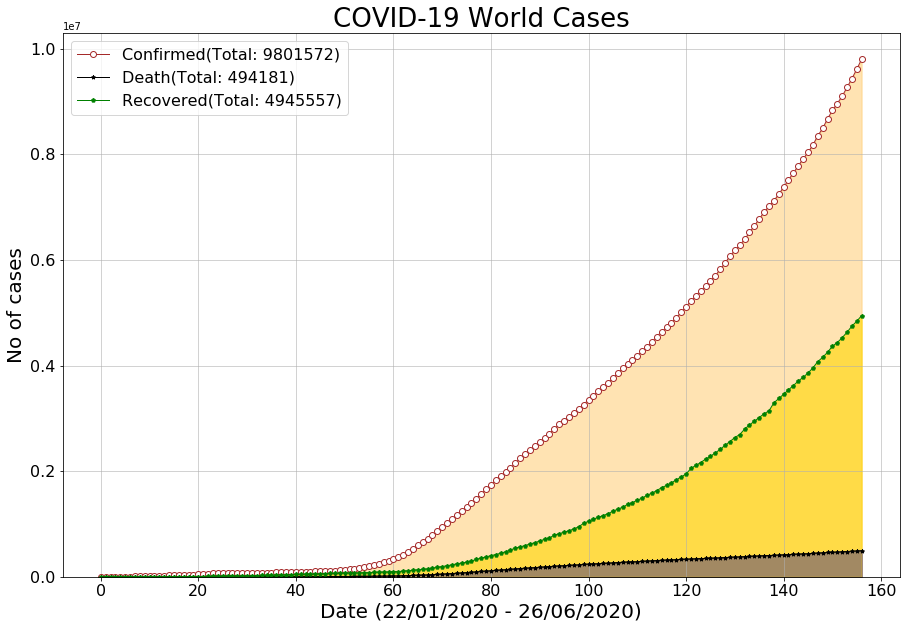

In [29]:
plt.figure(figsize = (15,10))
plt.plot(range(157), drp_c[0],color = 'brown',linewidth = 1, marker = 'o',markerfacecolor='#ffffff',markersize = 6)
plt.stackplot(range(157), drp_c[0],alpha = 0.3,color='orange')
plt.plot(range(157), drp_d[0],color = 'black',linewidth = 1, marker = '*',markersize = 4)
plt.stackplot(range(157), drp_d[0],alpha = 0.9,color = 'blue')
plt.plot(range(157), drp_r[0],color = 'green',linewidth = 1, marker = 'p',markersize = 4)
plt.stackplot(range(157), drp_r[0],alpha = 0.6,color = 'gold')
plt.xlabel('Date (22/01/2020 - 26/06/2020)',fontsize = 20)
plt.ylabel('No of cases',fontsize = 20)
plt.title('COVID-19 World Cases',fontsize = 26)
plt.grid(alpha = 0.7)
plt.tick_params(labelsize = 16)
plt.legend(['Confirmed(Total: 9801572)','Death(Total: 494181)','Recovered(Total: 4945557)'],prop={'size':16})
#plt.figtext(.15,.53, "Active cases:\n 4281596\nMortality Rate(per 100):\n 5.091787\nRecovery Rate(per 100):\n 50.353872\n Last 24 Hours:\n Total cases: 178479\n Total deaths: 6554", style='italic',size =15,bbox={})
#plt.savefig('COVID-19 Total Cases.png')

<hr>

## Top 10 Country (Case Study)
This method looks too long but it is very simple we use only copy past method and past same(only few changes) value 10times So don't be afraid

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:195: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



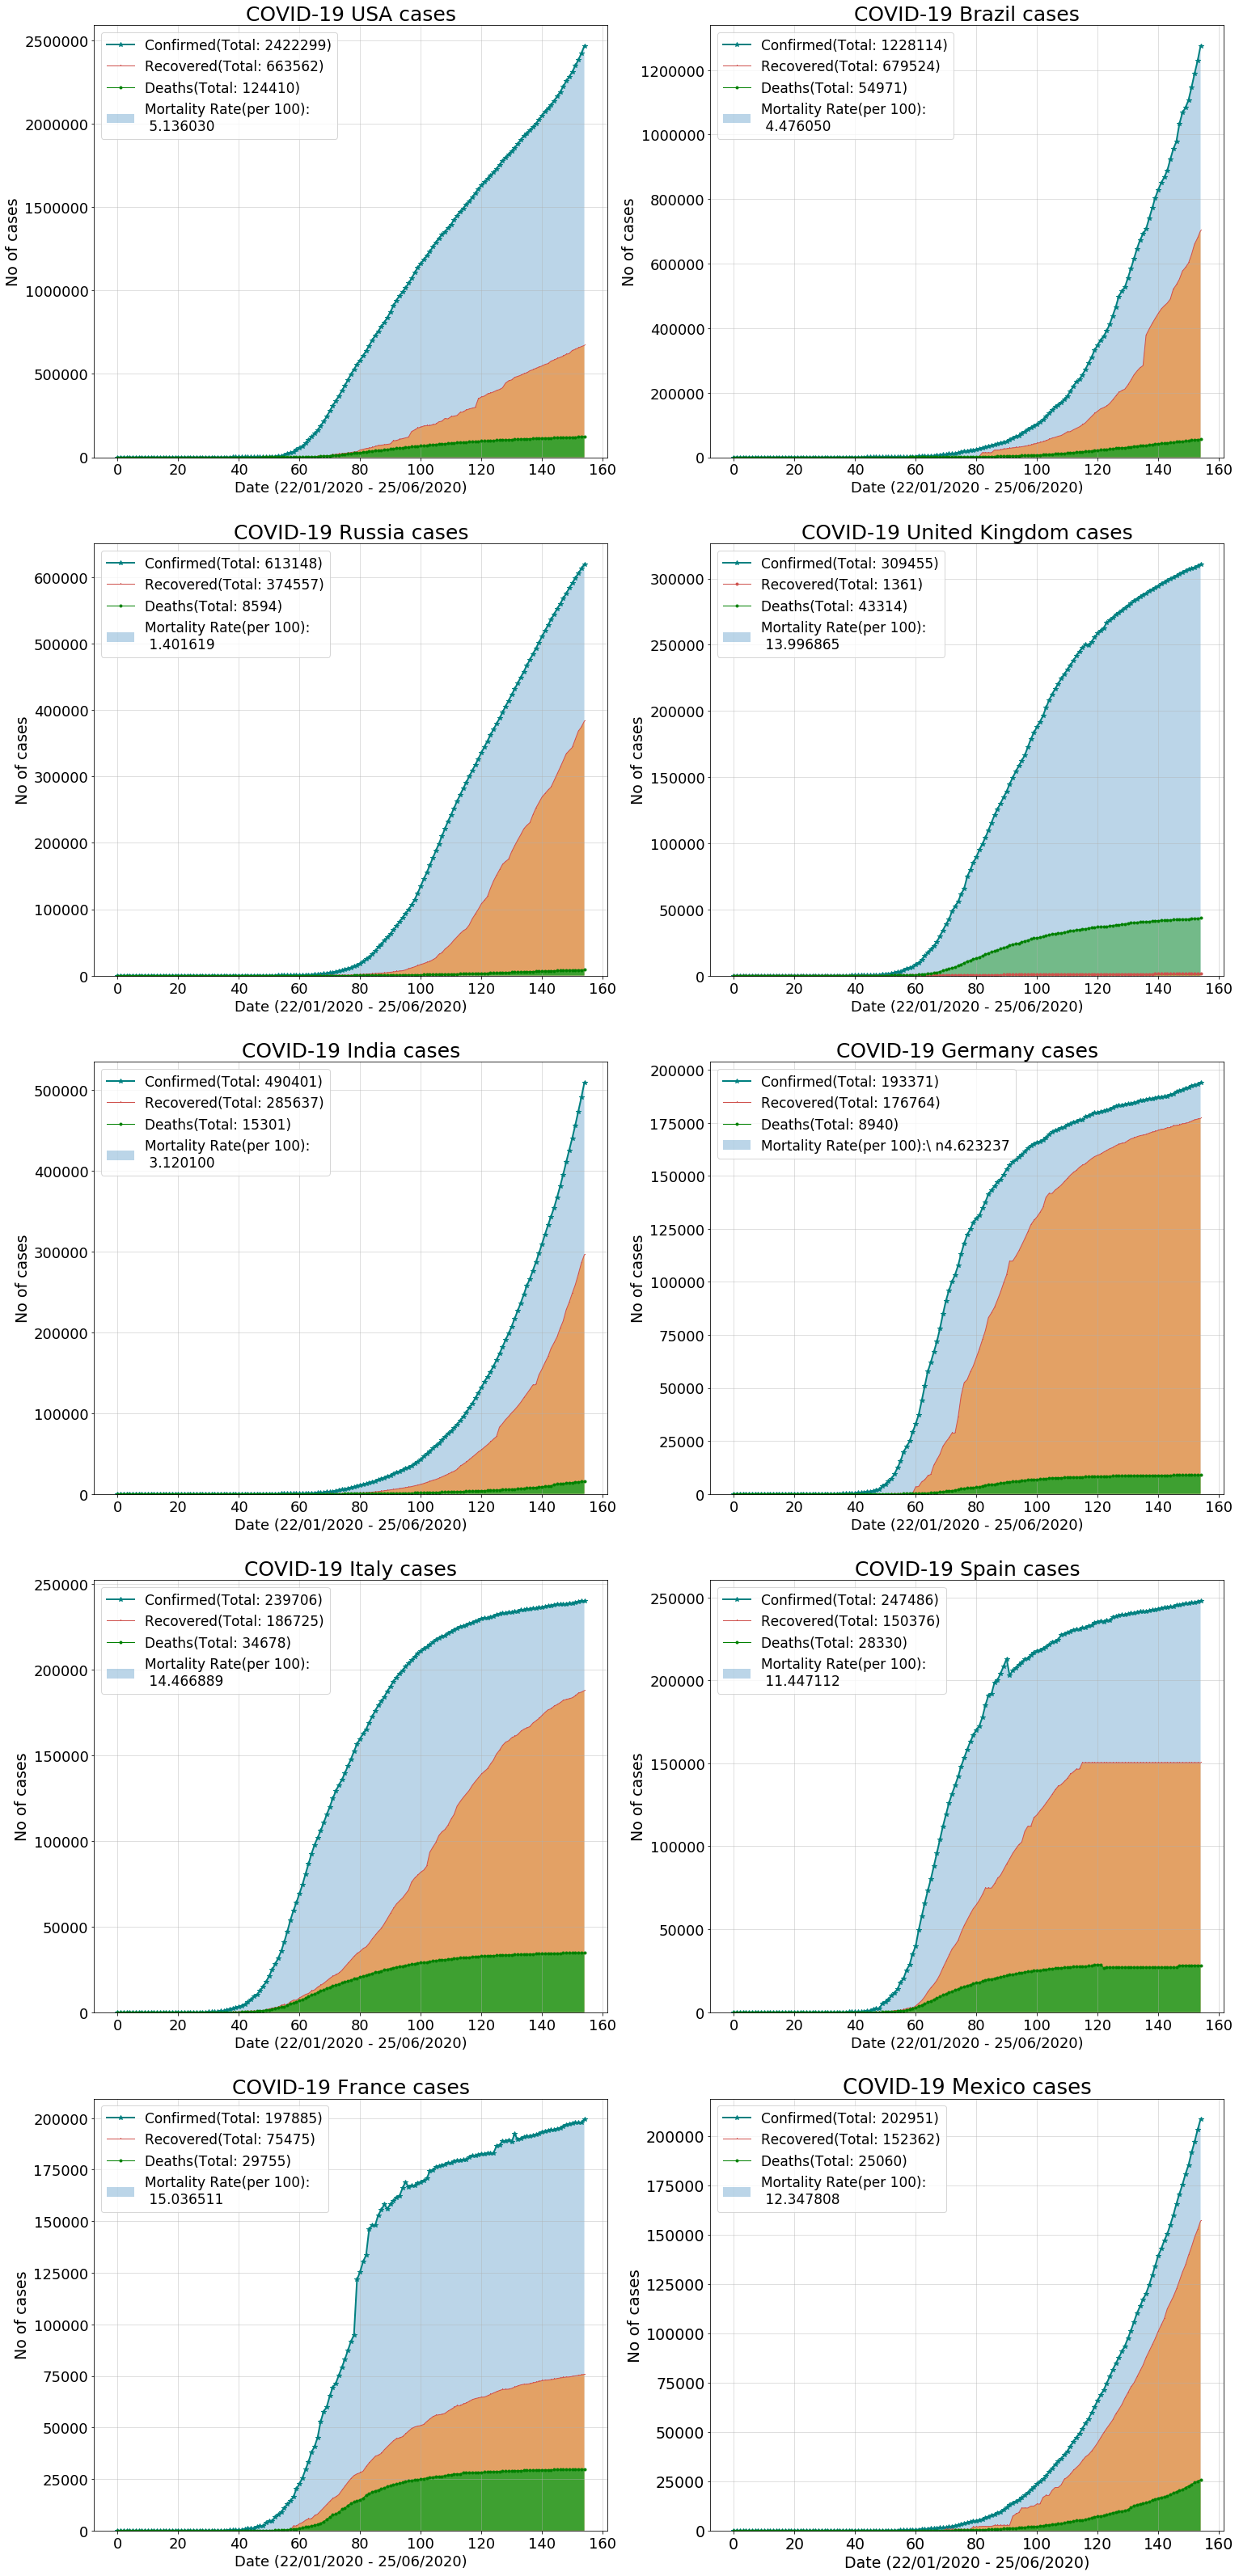

In [30]:
fig = plt.figure(1)
gridspec.GridSpec(5,2)

# Figure 1
plt.subplot2grid((5,5), (0,0))
plt.plot(range(155), conf_A['US'],color = 'teal',linewidth = 2, marker = '*')
plt.stackplot(range(155),conf_A['US'],alpha = 0.3)

plt.plot(range(155), recov_A['US'],color = '#cf524e',linewidth = 1, marker = ',')
plt.stackplot(range(155),recov_A['US'],alpha = 0.6)

plt.plot(range(155), dth_A['US'],color = 'g',linewidth = 1, marker = '.')
plt.stackplot(range(155),dth_A['US'],alpha = 0.9)

plt.xlabel('Date (22/01/2020 - 25/06/2020)',fontsize = 18)
plt.ylabel('No of cases',fontsize = 19)
plt.title('COVID-19 USA cases',fontsize = 25)
plt.grid(alpha = 0.5)
plt.legend(['Confirmed(Total: 2422299)','Recovered(Total: 663562)','Deaths(Total: 124410)','Mortality Rate(per 100):\n 5.136030'],prop={'size':17})
plt.tick_params(labelsize = 18) 
#plt.savefig('COVID-19 USA cases.png')

# Figure 2
plt.subplot2grid((5,5), (0,1))
plt.plot(range(155), conf_A['Brazil'],color = 'teal',linewidth = 2, marker = '*')
plt.stackplot(range(155),conf_A['Brazil'],alpha = 0.3)

plt.plot(range(155), recov_A['Brazil'],color = '#cf524e',linewidth = 1, marker = ',')
plt.stackplot(range(155),recov_A['Brazil'],alpha = 0.6)

plt.plot(range(155), dth_A['Brazil'],color = 'g',linewidth = 1, marker = '.')
plt.stackplot(range(155),dth_A['Brazil'],alpha = 0.9)

plt.xlabel('Date (22/01/2020 - 25/06/2020)',fontsize = 18)
plt.ylabel('No of cases',fontsize = 19)
plt.title('COVID-19 Brazil cases',fontsize = 25)
plt.grid(alpha = 0.5)
plt.legend(['Confirmed(Total: 1228114)','Recovered(Total: 679524)','Deaths(Total: 54971)','Mortality Rate(per 100):\n 4.476050'],prop={'size':17})
plt.tick_params(labelsize = 18) 
#plt.savefig('COVID-19 Brazil cases.png')

# Figure 3
plt.subplot2grid((5,5), (1,0))
plt.plot(range(155), conf_A['Russia'],color = 'teal',linewidth = 2, marker = '*')
plt.stackplot(range(155),conf_A['Russia'],alpha = 0.3)

plt.plot(range(155), recov_A['Russia'],color = '#cf524e',linewidth = 1, marker = ',')
plt.stackplot(range(155),recov_A['Russia'],alpha = 0.6)

plt.plot(range(155), dth_A['Russia'],color = 'g',linewidth = 1, marker = '.')
plt.stackplot(range(155),dth_A['Russia'],alpha = 0.9)

plt.xlabel('Date (22/01/2020 - 25/06/2020)',fontsize = 18)
plt.ylabel('No of cases',fontsize = 19)
plt.title('COVID-19 Russia cases',fontsize = 25)
plt.grid(alpha = 0.5)
plt.legend(['Confirmed(Total: 613148)','Recovered(Total: 374557)','Deaths(Total: 8594)','Mortality Rate(per 100):\n 1.401619'],prop={'size':17})
plt.tick_params(labelsize = 18) 
#plt.savefig('COVID-19 Russia cases.png')

# Figure 4
plt.subplot2grid((5,5), (1,1))
plt.plot(range(155), conf_A['United Kingdom'],color = 'teal',linewidth = 2, marker = '*')
plt.stackplot(range(155),conf_A['United Kingdom'],alpha = 0.3)

plt.plot(range(155), recov_A['United Kingdom'],color = '#cf524e',linewidth = 1, marker = '.')
plt.stackplot(range(155),recov_A['United Kingdom'],alpha = 1)

plt.plot(range(155), dth_A['United Kingdom'],color = 'g',linewidth = 1, marker = '.')
plt.stackplot(range(155),dth_A['United Kingdom'],alpha = 0.5)

plt.xlabel('Date (22/01/2020 - 25/06/2020)',fontsize = 18)
plt.ylabel('No of cases',fontsize = 19)
plt.title('COVID-19 United Kingdom cases',fontsize = 25)
plt.grid(alpha = 0.5)
plt.legend(['Confirmed(Total: 309455)','Recovered(Total: 1361)','Deaths(Total: 43314)','Mortality Rate(per 100):\n 13.996865'],prop={'size':17})
plt.tick_params(labelsize = 18) 
#plt.savefig('COVID-19 United Kingdom cases.png')

# Figure 5
plt.subplot2grid((5,5), (2,0))
plt.plot(range(155), conf_A['India'],color = 'teal',linewidth = 2, marker = '*')
plt.stackplot(range(155),conf_A['India'],alpha = 0.3)

plt.plot(range(155), recov_A['India'],color = '#cf524e',linewidth = 1, marker = ',')
plt.stackplot(range(155),recov_A['India'],alpha = 0.6)

plt.plot(range(155), dth_A['India'],color = 'g',linewidth = 1, marker = '.')
plt.stackplot(range(155),dth_A['India'],alpha = .9)

plt.xlabel('Date (22/01/2020 - 25/06/2020)',fontsize = 18)
plt.ylabel('No of cases',fontsize = 19)
plt.title('COVID-19 India cases',fontsize = 25)
plt.grid(alpha = 0.5)
plt.legend(['Confirmed(Total: 490401)','Recovered(Total: 285637)','Deaths(Total: 15301)','Mortality Rate(per 100):\n 3.120100'],prop={'size':17})
plt.tick_params(labelsize = 18) 
#plt.savefig('COVID-19 India cases.png')

# Figure 6
plt.subplot2grid((5,5), (2,1))
plt.plot(range(155), conf_A['Germany'],color = 'teal',linewidth = 2, marker = '*')
plt.stackplot(range(155),conf_A['Germany'],alpha = 0.3)

plt.plot(range(155), recov_A['Germany'],color = '#cf524e',linewidth = 1, marker = ',')
plt.stackplot(range(155),recov_A['Germany'],alpha = 0.6)

plt.plot(range(155), dth_A['Germany'],color = 'g',linewidth = 1, marker = '.')
plt.stackplot(range(155),dth_A['Germany'],alpha = .9)

plt.xlabel('Date (22/01/2020 - 25/06/2020)',fontsize = 18)
plt.ylabel('No of cases',fontsize = 19)
plt.title('COVID-19 Germany cases',fontsize = 25)
plt.grid(alpha = 0.5)
plt.legend(['Confirmed(Total: 193371)','Recovered(Total: 176764)','Deaths(Total: 8940)','Mortality Rate(per 100):\ n4.623237'],prop={'size':17})
plt.tick_params(labelsize = 18) 
#plt.savefig('COVID-19 Germany cases.png')

# Figure 7
plt.subplot2grid((5,5), (3,0))
plt.plot(range(155), conf_A['Italy'],color = 'teal',linewidth = 2, marker = '*')
plt.stackplot(range(155),conf_A['Italy'],alpha = 0.3)

plt.plot(range(155), recov_A['Italy'],color = '#cf524e',linewidth = 1, marker = ',')
plt.stackplot(range(155),recov_A['Italy'],alpha = 0.6)

plt.plot(range(155), dth_A['Italy'],color = 'g',linewidth = 1, marker = '.')
plt.stackplot(range(155),dth_A['Italy'],alpha = .9)

plt.xlabel('Date (22/01/2020 - 25/06/2020)',fontsize = 18)
plt.ylabel('No of cases',fontsize = 19)
plt.title('COVID-19 Italy cases',fontsize = 25)
plt.grid(alpha = 0.5)
plt.legend(['Confirmed(Total: 239706)','Recovered(Total: 186725)','Deaths(Total: 34678)','Mortality Rate(per 100):\n 14.466889'],prop={'size':17})
plt.tick_params(labelsize = 18) 
#plt.savefig('COVID-19 Italy cases.png')

# Figure 8
plt.subplot2grid((5,5), (3,1))
plt.plot(range(155), conf_A['Spain'],color = 'teal',linewidth = 2, marker = '*')
plt.stackplot(range(155),conf_A['Spain'],alpha = 0.3)

plt.plot(range(155), recov_A['Spain'],color = '#cf524e',linewidth = 1, marker = ',')
plt.stackplot(range(155),recov_A['Spain'],alpha = 0.6)

plt.plot(range(155), dth_A['Spain'],color = 'g',linewidth = 1, marker = '.')
plt.stackplot(range(155),dth_A['Spain'],alpha = .9)

plt.xlabel('Date (22/01/2020 - 25/06/2020)',fontsize = 18)
plt.ylabel('No of cases',fontsize = 19)
plt.title('COVID-19 Spain cases',fontsize = 25)
plt.grid(alpha = 0.5)
plt.legend(['Confirmed(Total: 247486)','Recovered(Total: 150376)','Deaths(Total: 28330)','Mortality Rate(per 100):\n 11.447112'],prop={'size':17})
plt.tick_params(labelsize = 18) 
#plt.savefig('COVID-19 Spain cases.png')

# Figure 9
plt.subplot2grid((5,5), (4,0))
plt.plot(range(155), conf_A['France'],color = 'teal',linewidth = 2, marker = '*')
plt.stackplot(range(155),conf_A['France'],alpha = 0.3)

plt.plot(range(155), recov_A['France'],color = '#cf524e',linewidth = 1, marker = ',')
plt.stackplot(range(155),recov_A['France'],alpha = 0.6)

plt.plot(range(155), dth_A['France'],color = 'g',linewidth = 1, marker = '.')
plt.stackplot(range(155),dth_A['France'],alpha = .9)

plt.xlabel('Date (22/01/2020 - 25/06/2020)',fontsize = 18)
plt.ylabel('No of cases',fontsize = 19)
plt.title('COVID-19 France cases',fontsize = 25)
plt.grid(alpha = 0.5)
plt.legend(['Confirmed(Total: 197885)','Recovered(Total: 75475)','Deaths(Total: 29755)','Mortality Rate(per 100):\n 15.036511'],prop={'size':17})
plt.tick_params(labelsize = 18) 
#plt.savefig('COVID-19 France cases.png')

# Figure 10
plt.subplot2grid((5,5), (4,1))
plt.plot(range(155), conf_A['Mexico'],color = 'teal',linewidth = 2, marker = '*')
plt.stackplot(range(155),conf_A['Mexico'],alpha = 0.3)

plt.plot(range(155), recov_A['Mexico'],color = '#cf524e',linewidth = 1, marker = ',')
plt.stackplot(range(155),recov_A['Mexico'],alpha = 0.6)

plt.plot(range(155), dth_A['Mexico'],color = 'g',linewidth = 1, marker = '.')
plt.stackplot(range(155),dth_A['Mexico'],alpha = .9)

plt.xlabel('Date (22/01/2020 - 25/06/2020)',fontsize = 19)
plt.ylabel('No of cases',fontsize = 20)
plt.title('COVID-19 Mexico cases',fontsize = 26)
plt.grid(alpha = 0.5)
plt.legend(['Confirmed(Total: 202951)','Recovered(Total: 152362)','Deaths(Total: 25060)','Mortality Rate(per 100):\n 12.347808'],prop={'size':17})
plt.tick_params(labelsize = 19) 
#plt.savefig('COVID-19 Mexico cases.png')


fig.tight_layout()
fig.set_size_inches(w=66, h=57)
   

<hr>

## COVID-19 China cases

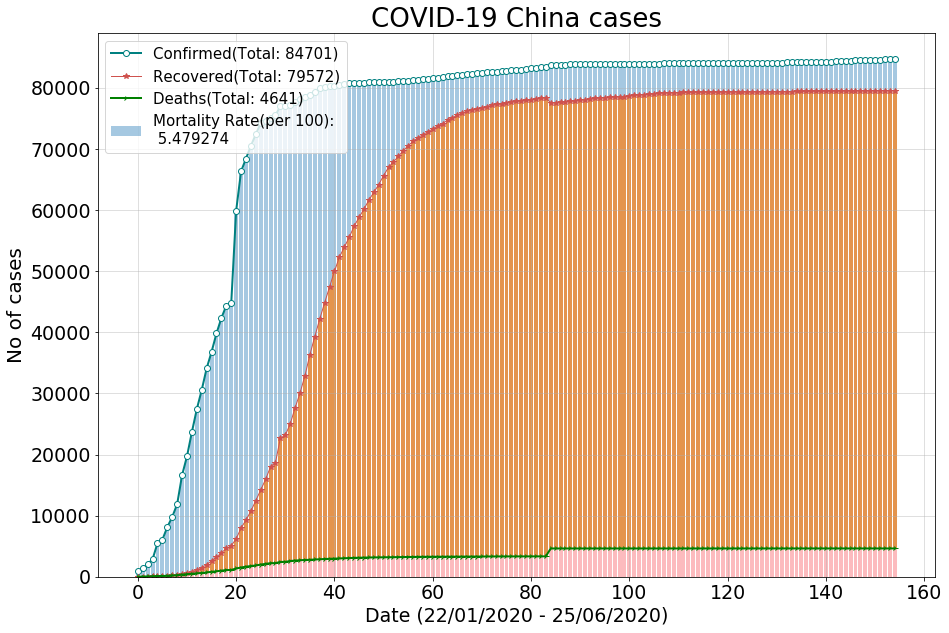

In [31]:
plt.figure(figsize= (15,10))

plt.plot(range(155), conf_A['China'],color = 'teal',linewidth = 2, marker = 'o', markerfacecolor ='#ffffff')
plt.bar(range(155),conf_A['China'],alpha = 0.4)

plt.plot(range(155), recov_A['China'],color = '#cf524e',linewidth = 1, marker = '*')
plt.bar(range(155),recov_A['China'],alpha = 0.7)

plt.plot(range(155), dth_A['China'],color = 'g',linewidth = 2, marker = '4')
plt.bar(range(155),dth_A['China'],alpha = .9,color = 'pink')

plt.xlabel('Date (22/01/2020 - 25/06/2020)',fontsize = 19)
plt.ylabel('No of cases',fontsize = 20)
plt.title('COVID-19 China cases',fontsize = 26)
plt.grid(alpha = 0.5)
plt.legend(['Confirmed(Total: 84701)','Recovered(Total: 79572)','Deaths(Total: 4641)','Mortality Rate(per 100):\n 5.479274'],prop={'size':15})
plt.tick_params(labelsize = 19) 
plt.savefig('COVID-19 China cases.png')

#

<hr>

## World Heat Maps

In [32]:
df = pd.DataFrame(covid_19['Confirmed'])
df = df.reset_index() # change index into a column
figure = px.choropleth(df,locations = 'Country/Region', color=np.log10(df["Confirmed"]),
                    hover_data=["Confirmed"],locationmode="country names")
figure.update_geos(fitbounds='locations', visible=False)
figure.update_layout(title_text="Confirmed Cases Heat Map_",titlefont=dict(size=20))
figure.update_coloraxes(colorbar_title="Log Scale",colorscale="teal")
#fig.to_image("Global Heat Map confirmed.png")
iplot(figure)

In [45]:
temp_Rc = pd.DataFrame(covid_19['Recovered'])
temp_Rc = temp_Rc.reset_index()
figure = px.choropleth(temp_Rc,locations = 'Country/Region',color=np.log10(temp_Rc['Recovered']),
                hover_data=["Recovered"],locationmode="country names")
figure.update_geos(fitbounds="locations", visible=False)
figure.update_layout(title_text="Recovered Cases Heat Map_",titlefont=dict(size=20))
figure.update_coloraxes(colorbar_title="Log Scale",colorscale="Greens")
#fig.to_image("Global Heat Map Recovered.png")
iplot(figure)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log10



In [34]:
temp_d = pd.DataFrame(covid_19['Deaths'])
temp_d = temp_d.reset_index()
figure = px.choropleth(temp_d,locations = 'Country/Region', color=np.log10(temp_d["Deaths"]),
                    hover_data=["Deaths"],locationmode="country names")
figure.update_geos(fitbounds = 'locations', visible=False)
figure.update_layout(title_text="Death Cases Heat Map_",titlefont=dict(size=20))
figure.update_coloraxes(colorbar_title="Log Scale",colorscale="reds")
#fig.to_image("Global Heat Map Deaths.png")
iplot(figure)

In [35]:
# Copied:

world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['Lat'], confirmed_df.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['Country/Region']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(confirmed_df.iloc[i]['Province/State']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(deaths_df.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(deaths_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map


<hr>

# COVID-19 cases in Percentage
* <font style="color:green; font-size:20px;line-height:24px;">TOTAL Cases.</font>
* <font style="color:green; font-size:20px;line-height:24px;">CONFIRMED Cases.</font>
* <font style="color:green; font-size:20px;line-height:24px;">RECOVERED Cases.</font>
* <font style="color:green; font-size:20px;line-height:24px;">DEATH Cases.</font>
* <font style="color:green; font-size:20px;line-height:24px;">ACTIVE Cases.</font>

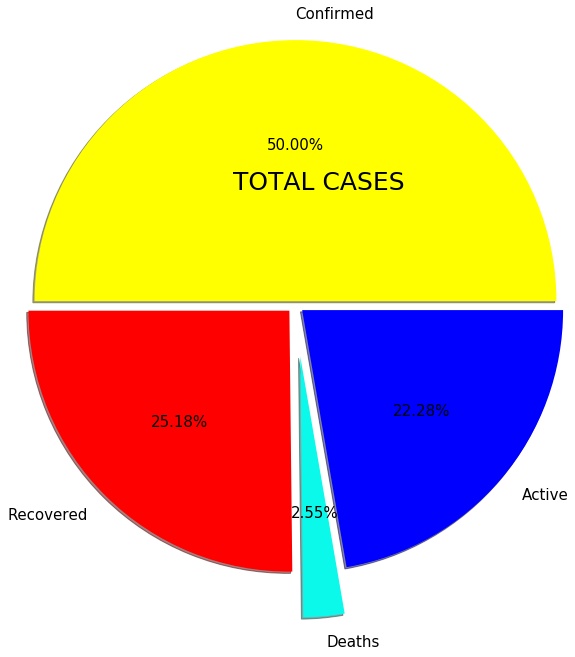

In [36]:
ex = (9609829,4838921,489312,4281596)
label = ('Confirmed','Recovered','Deaths','Active')

plt.title('TOTAL CASES',size = 25, loc = 'right')
plt.pie(ex, labels = label,autopct='%.2f%%',radius=3, colors = ('yellow','r','#0bf9ea','b'), explode= [.04,.1,.6,.1],
        shadow= True, pctdistance= 0.6, textprops = {'fontsize':15})
plt.savefig('Total cases(pie chart).png')
plt.show()

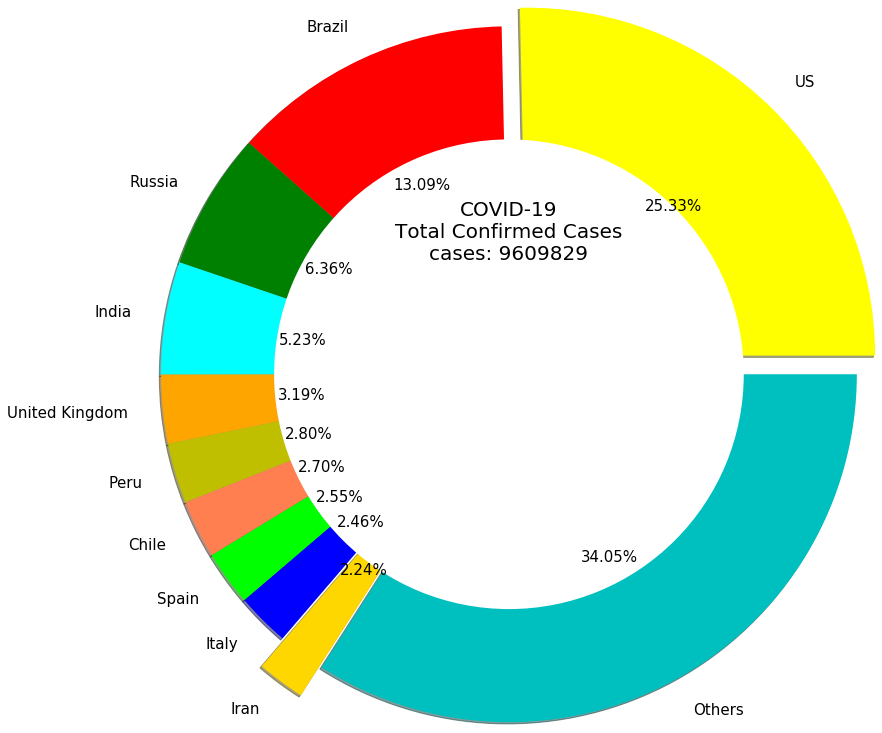

In [37]:
dt = (df_conf['Confirmed'].values[:10])
dt = np.append(dt,3316458)
label = (df_conf['Confirmed'].index[:10])
label = np.append(label, 'Others')

# Figure__
size_centre = [5]
plt.title('COVID-19\nTotal Confirmed Cases\ncases: 9609829',size = 20)
pie1 = plt.pie(dt,labels = label, radius=4, autopct = '%.2f%%',shadow = True,explode = [.3,0,0,0,0,0,0,0,0,.4,0],
               textprops = {'fontsize':15}, colors= ('yellow','r','g','cyan','orange','y','coral','lime','b','gold','c'))
pie2 = plt.pie(size_centre, radius = 2.7, colors = 'white')
plt.savefig('Confirmed cases(pie chart).png')
plt.show()

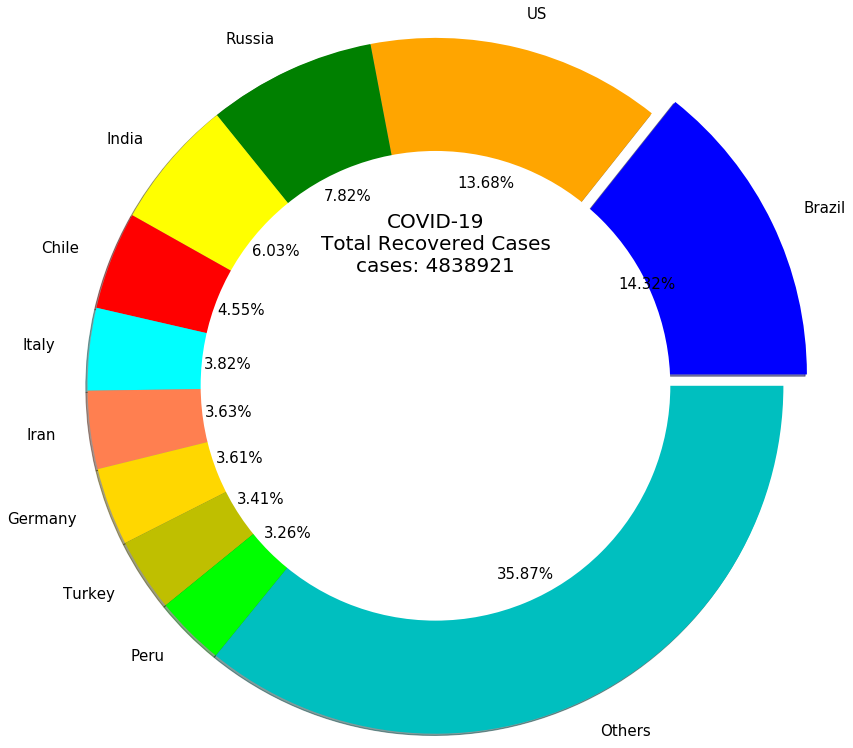

In [38]:
dt1 = (df_recv['Recovered'].values[:10])
dt1 = np.append(dt1,1759654)
label1 = (df_recv['Recovered'].index[:10])
label1 = np.append(label1, 'Others')

# Figure__
size_centre = [5]
plt.title('COVID-19\nTotal Recovered Cases\ncases: 4838921',size = 20)
pie1 = plt.pie(dt1,labels = label1, radius=4, autopct = '%.2f%%',shadow = True,explode = [.3,0,0,0,0,0,0,0,0,0,0],
               textprops = {'fontsize':15}, colors= ('b','orange','g','yellow','r','cyan','coral','gold','y','lime','c'))
pie2 = plt.pie(size_centre, radius = 2.7, colors = 'white')
plt.savefig('Total Recovered(pie chart).png')
plt.show()

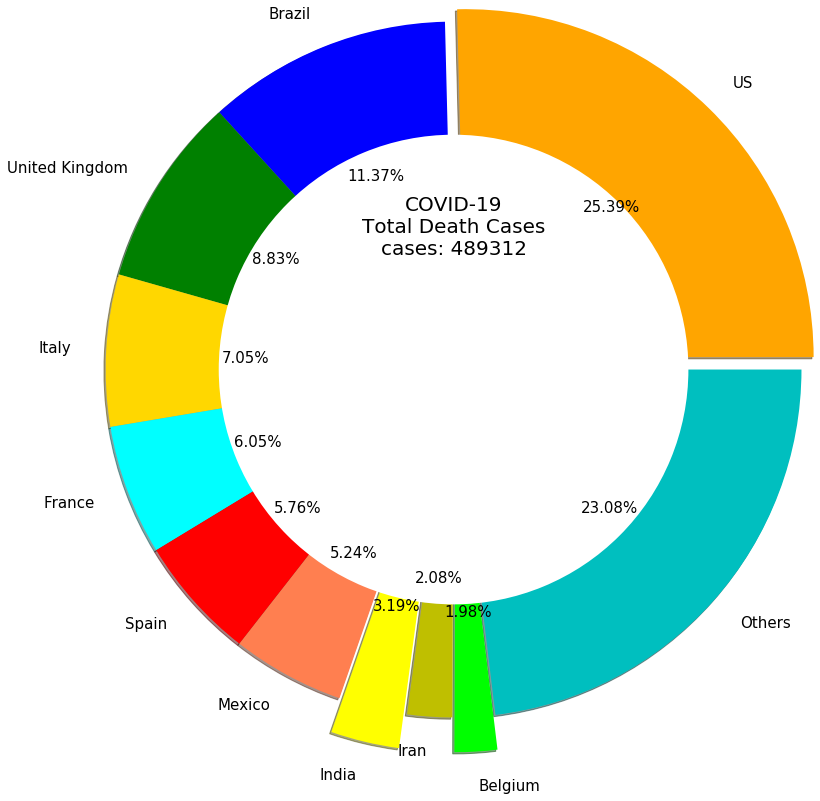

In [39]:
dt2 = (df_dth['Deaths'].values[:10])
dt2 = np.append(dt2,113637)
label2 = (df_dth['Deaths'].index[:10])
label2 = np.append(label2, 'Others')

# Figure__
size_centre = [5]
plt.title('COVID-19\nTotal Death Cases\ncases: 489312',size = 20)
pie1 = plt.pie(dt2,labels = label2, radius=4, autopct = '%.2f%%',shadow = True,explode = [.2,0,0,0,0,0,0,.4,0,.4,0],
               textprops = {'fontsize':15}, colors= ('orange','b','g','gold','cyan','r','coral','yellow','y','lime','c'))
pie2 = plt.pie(size_centre, radius = 2.7, colors = 'white')
plt.savefig('Total Death(pie chart).png')
plt.show()

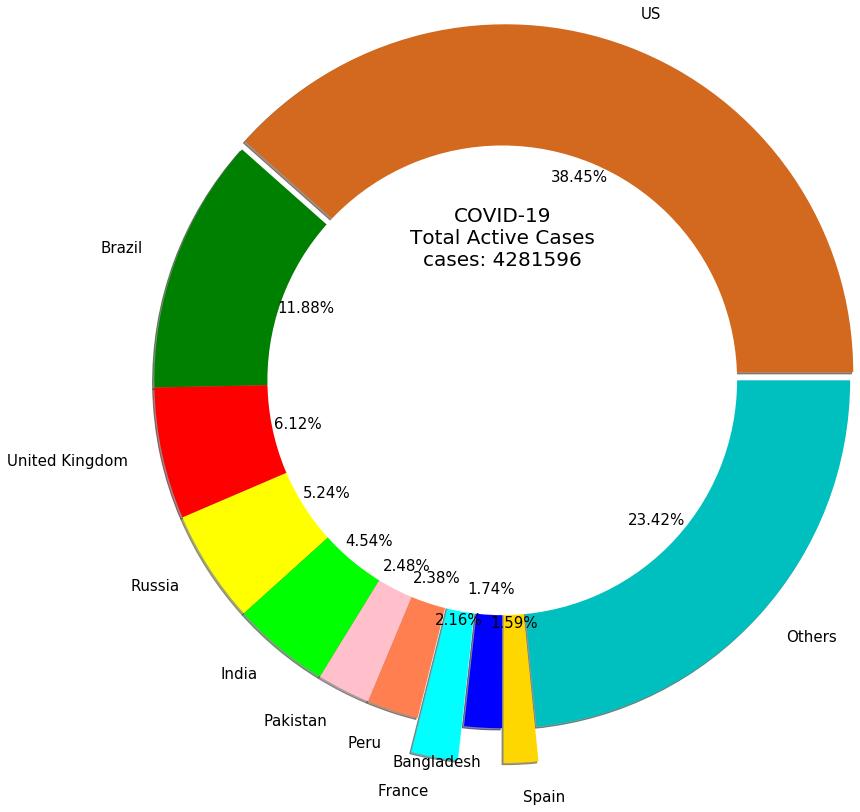

In [40]:
dt3 = (df_actv['Active'].values[:10])
dt3 = np.append(dt3,1018254)
label3 = (df_actv['Active'].index[:10])
label3 = np.append(label3, 'Others')

# Figure__
size_centre = [5]
plt.title('COVID-19\nTotal Active Cases\ncases: 4281596',size = 20)
pie1 = plt.pie(dt3,labels = label3, radius=4, autopct = '%.2f%%',shadow = True,explode = [0.1,0,0,0,0,0,0,.4,0,.4,0],
               textprops = {'fontsize':15}, colors= ('chocolate','g','r','yellow','lime','pink','coral','cyan','b','gold','c'))
pie2 = plt.pie(size_centre, radius = 2.7, colors = 'white')
plt.savefig('Total Active(pie chart).png')
plt.show()

<hr>

# Last 10 Day Cases

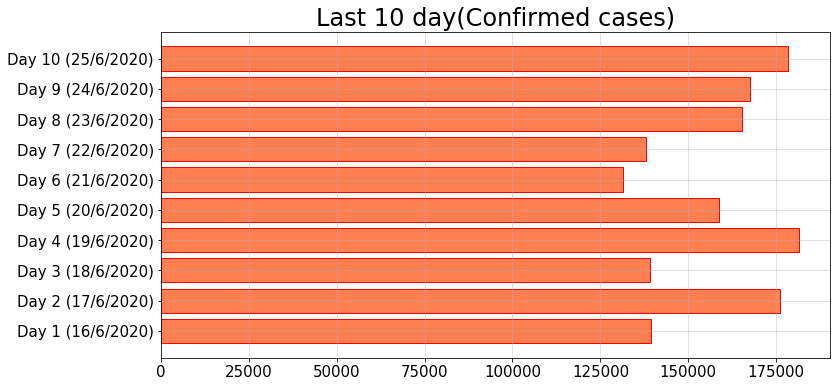

In [41]:
x = ('Day 1 (16/6/2020)','Day 2 (17/6/2020)','Day 3 (18/6/2020)','Day 4 (19/6/2020)','Day 5 (20/6/2020)','Day 6 (21/6/2020)','Day 7 (22/6/2020)','Day 8 (23/6/2020)','Day 9 (24/6/2020)','Day 10 (25/6/2020)')
y = (139479,176010,139026,181347,158863,131421,138036,165292,167415,178479)

plt.figure(figsize=(12,6))
plt.barh(x,y,color = 'coral',edgecolor = 'red')
plt.title('Last 10 day(Confirmed cases)', size = 24)
plt.tick_params(labelsize = 15)
plt.grid(alpha = 0.5)
plt.show()

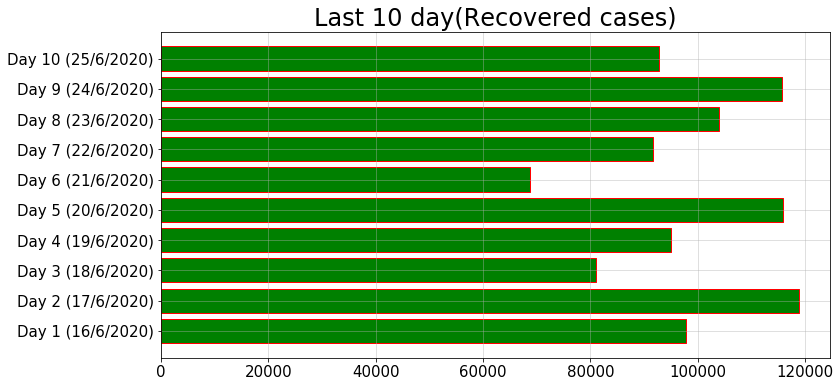

In [42]:
x = ('Day 1 (16/6/2020)','Day 2 (17/6/2020)','Day 3 (18/6/2020)','Day 4 (19/6/2020)','Day 5 (20/6/2020)','Day 6 (21/6/2020)','Day 7 (22/6/2020)','Day 8 (23/6/2020)','Day 9 (24/6/2020)','Day 10 (25/6/2020)')
y = (97831,118786,81144,95008,115825,68696,91705,104058,115727,92803)

plt.figure(figsize=(12,6))
plt.barh(x,y,color = 'g',edgecolor = 'red')
plt.title('Last 10 day(Recovered cases)', size = 24)
plt.tick_params(labelsize = 15)
plt.grid(alpha = 0.5)
plt.show()

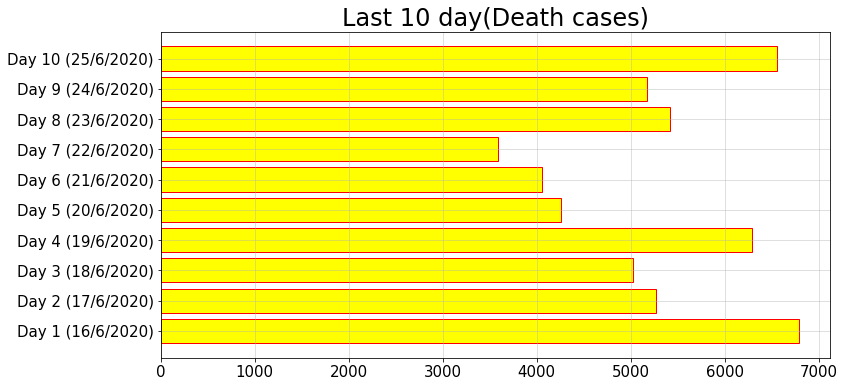

In [43]:
x = ('Day 1 (16/6/2020)','Day 2 (17/6/2020)','Day 3 (18/6/2020)','Day 4 (19/6/2020)','Day 5 (20/6/2020)','Day 6 (21/6/2020)','Day 7 (22/6/2020)','Day 8 (23/6/2020)','Day 9 (24/6/2020)','Day 10 (25/6/2020)')
y = (6786,5274,5020,6289,4254,4061,3588,5416,5171,6554)

plt.figure(figsize=(12,6))
plt.barh(x,y,color = 'yellow',edgecolor = 'red')
plt.title('Last 10 day(Death cases)', size = 24)
plt.tick_params(labelsize = 15)
plt.grid(alpha = 0.5)
plt.show()

<hr>

# COVID-19 World Trend

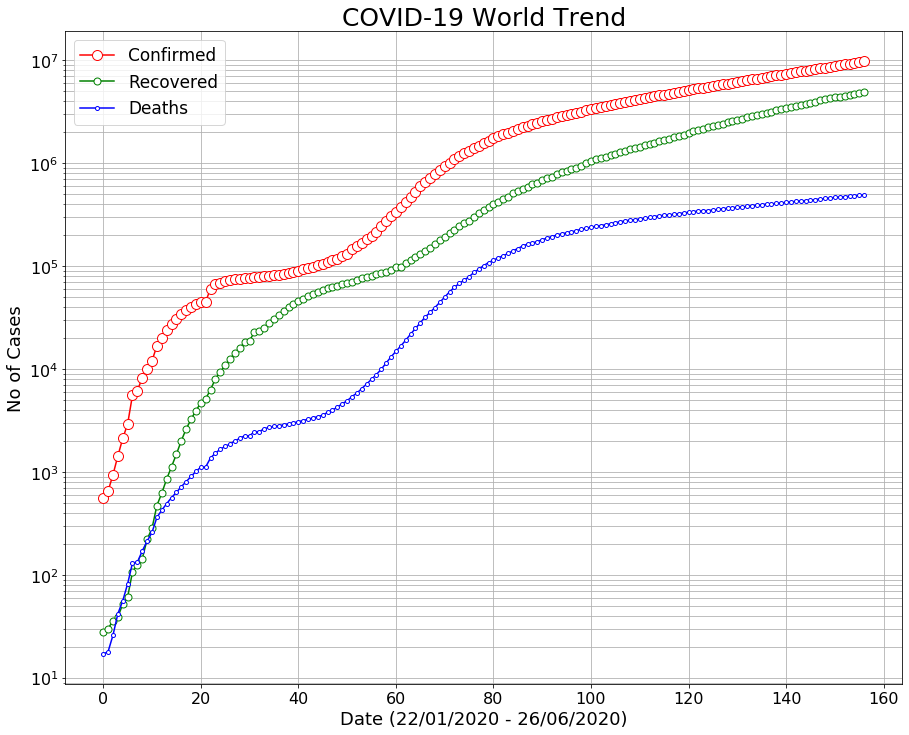

In [44]:
plt.figure(figsize=(15,12))

plt.plot(range(157), drp_c, color = 'r',marker = 'o', markersize = 10, markerfacecolor = '#ffffff')
plt.plot(range(157), drp_r, color = 'g',marker = 'o', markersize = 7, markerfacecolor = '#ffffff')
plt.plot(range(157), drp_d, color = 'b',marker = 'o', markersize = 4, markerfacecolor = '#ffffff')

plt.title('COVID-19 World Trend', size = 25)
plt.xlabel('Date (22/01/2020 - 26/06/2020)', size = 18)
plt.ylabel('No of Cases', size = 18)
plt.tick_params(labelsize = 16)
plt.yscale('log')
plt.grid(which = 'both')
plt.legend(['Confirmed','Recovered','Deaths'], prop = {'size': 17})
#plt.savefig('COVID-19 World Trend.png')

## <font style = "color:brown"> THANK YOU for watching my notebook</font>

# <font style = "color:green"> If you like my EFFORT then please vote for me </font>
 
<hr>

## <font style = "color:red"> Note:</font>
* @ Incomplete